In [1]:
# Módulo para instalar librerías faltantes y necesarias para analizar el dataset y realizar la visualización.

# pip install plotly

In [2]:
# Importación de bibliotecas que necesitamos para el análisis de datos.

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import plotly.express as px

In [3]:
# Lectura y extracción del dataset.

# Ignore all warnings () 
warnings.filterwarnings('ignore') 

# Carga de los ficheros de datos, en nuestro caso están en .csv

crimes_df = pd.read_csv('C:/Users/le Roj/Desktop/Jupyter Notebook/Data/Crime Women India/CrimesOnWomenData.csv')
description_df = pd.read_csv('C:/Users/le Roj/Desktop/Jupyter Notebook/Data/Crime Women India/description.csv')

# Mostrar las primeras 5 filas de los ficheros.

print("CrimesOnWomenData.csv - 5 primeras  filas:")
print(crimes_df.head())

print("\nDescription.csv - 5 primeras filas:")
print(description_df.head())

CrimesOnWomenData.csv - 5 primeras  filas:
   Unnamed: 0              State  Year  Rape   K&A   DD   AoW   AoM    DV  WT
0           0     ANDHRA PRADESH  2001   871   765  420  3544  2271  5791   7
1           1  ARUNACHAL PRADESH  2001    33    55    0    78     3    11   0
2           2              ASSAM  2001   817  1070   59   850     4  1248   0
3           3              BIHAR  2001   888   518  859   562    21  1558  83
4           4       CHHATTISGARH  2001   959   171   70  1763   161   840   0

Description.csv - 5 primeras filas:
   Unnamed: 0 Column Names         Explanation
0           0        State               State
1           1         Year                Year
2           2         Rape   No. of Rape cases
3           3          K&A  Kidnap And Assault
4           4           DD        Dowry Deaths


In [4]:
# Crear un diccionario para renombrar las columnas

column_names = {
    'Rape': 'Casos de violación',
    'K&A': 'Secuestros y asaltos',
    'DD': 'Muertes por la dote',
    'AoW': 'Asalto a mujeres',
    'AoM': 'Asalto a menores (niñas y adolescentes)',
    'DV': 'Violencia doméstica',
    'WT': 'Brujería',
    'State' : 'Estado',
    'Year' : 'Año',
}

# Renombrar las columnas en el DataFrame.

crimes_df.rename(columns=column_names, inplace=True)

# Verificar los nombres de las columnas renombradas.

print("\nRenamed Columns:")
print(crimes_df.columns)



Renamed Columns:
Index(['Unnamed: 0', 'Estado', 'Año', 'Casos de violación',
       'Secuestros y asaltos', 'Muertes por la dote', 'Asalto a mujeres',
       'Asalto a menores (niñas y adolescentes)', 'Violencia doméstica',
       'Brujería'],
      dtype='object')


In [5]:
# Quitamos las columnas que no utilizaremos en el análisis de datos y su visualización. 

crimes_df_cleaned = crimes_df.drop(columns=['Unnamed: 0'])
crimes_df_cleaned['Estado'] = crimes_df_cleaned['Estado'].str.upper()

# Verificamos la DataFrame ya limpia.

print("\nCleaned Dataset Columns:")
print(crimes_df_cleaned.columns)
print("\nFirst 5 Rows of the Cleaned Dataset:")
print(crimes_df_cleaned.head())


Cleaned Dataset Columns:
Index(['Estado', 'Año', 'Casos de violación', 'Secuestros y asaltos',
       'Muertes por la dote', 'Asalto a mujeres',
       'Asalto a menores (niñas y adolescentes)', 'Violencia doméstica',
       'Brujería'],
      dtype='object')

First 5 Rows of the Cleaned Dataset:
              Estado   Año  Casos de violación  Secuestros y asaltos  \
0     ANDHRA PRADESH  2001                 871                   765   
1  ARUNACHAL PRADESH  2001                  33                    55   
2              ASSAM  2001                 817                  1070   
3              BIHAR  2001                 888                   518   
4       CHHATTISGARH  2001                 959                   171   

   Muertes por la dote  Asalto a mujeres  \
0                  420              3544   
1                    0                78   
2                   59               850   
3                  859               562   
4                   70              1763   

   

In [6]:
# Instalamos otra librería para visualizaciones.

import plotly.express as px

# Crear un heatmap (mapa de calor) usando Plotly.

heatmap_data = crimes_df_cleaned.pivot_table(
    values='Casos de violación', 
    index='Estado', 
    columns='Año', 
    aggfunc='sum', 
    fill_value=0
)

# Crear el heatmap (mapa de calor) interactivo con título.

fig = px.imshow(
    heatmap_data,
    labels=dict(x="Año", y="Estado", color="Casos de violación"),
    x=heatmap_data.columns,
    y=heatmap_data.index,
    color_continuous_scale="YlGnBu",
    aspect="auto",
    title="Casos de violación por Estado y año (2001-2021)" 
)

# Mostrar el heatmap (mapa de calor).

fig.show()


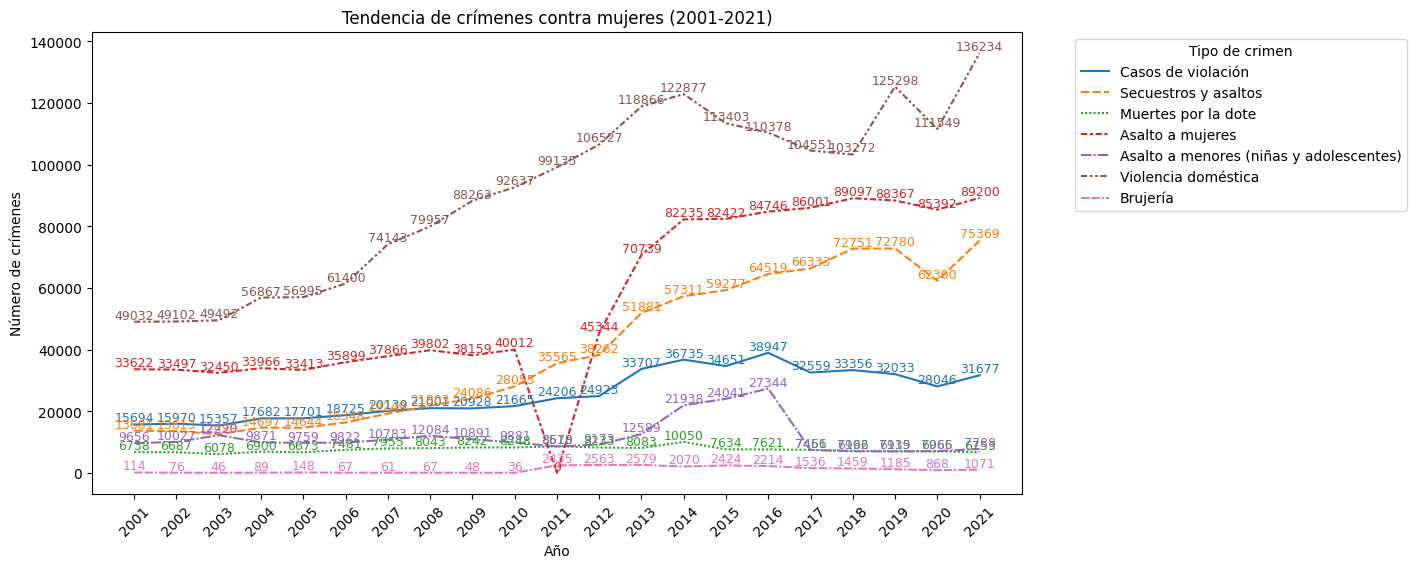

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por año y sumar todos los tipos de crímenes.

crime_trend = crimes_df_cleaned.groupby('Año').sum()

# Tendencia de crímenes contra mujeres (2001-2021).

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=crime_trend)

# Ajustar el título y etiquetas
plt.title('Tendencia de crímenes contra mujeres (2001-2021)')
plt.xlabel('Año')
plt.ylabel('Número de crímenes')

# Establecer los valores del eje X como enteros.

years = crime_trend.index
plt.xticks(ticks=range(min(years), max(years) + 1), rotation=45)

# Mostrar la leyenda.

plt.legend(title='Tipo de crimen', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir anotaciones a cada punto en el gráfico.

for line in ax.get_lines():
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    for x, y in zip(x_data, y_data):
        ax.text(x, y, f'{int(y)}', color=line.get_color(), fontsize=9, ha='center', va='bottom')

# Mostrar el gráfico.

plt.show()


<Figure size 1200x600 with 0 Axes>

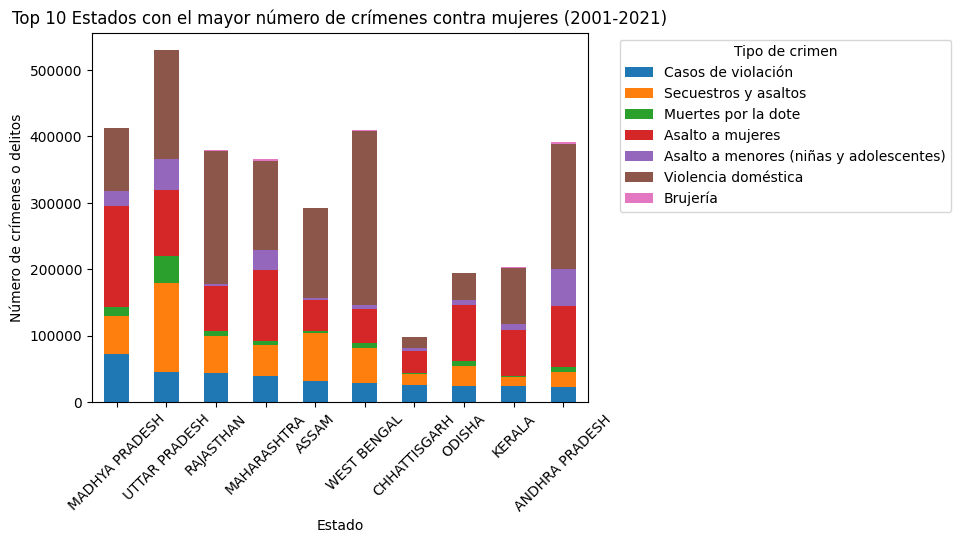

In [8]:
#crimes_df_cleaned = crimes_df.copy()  # Realiza más limpieza si es necesario

# Eliminar la columna 'Año' para la visualización.

crimes_df_cleaned_eda = crimes_df_cleaned.drop(columns=['Año'])

# Total de crímenes por Estado.

state_crime = crimes_df_cleaned_eda.groupby('Estado').sum().sort_values(by='Casos de violación', ascending=False)

# Top 10 Estados con el mayor número de crímenes o delitos.

top_states = state_crime.head(10)

# Graficar.

plt.figure(figsize=(12, 6))
top_states.plot(kind='bar', stacked=True)
plt.title('Top 10 Estados con el mayor número de crímenes contra mujeres (2001-2021)')
plt.xlabel('Estado')
plt.ylabel('Número de crímenes o delitos')
plt.xticks(rotation=45)
plt.legend(title='Tipo de crimen', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1400x800 with 0 Axes>

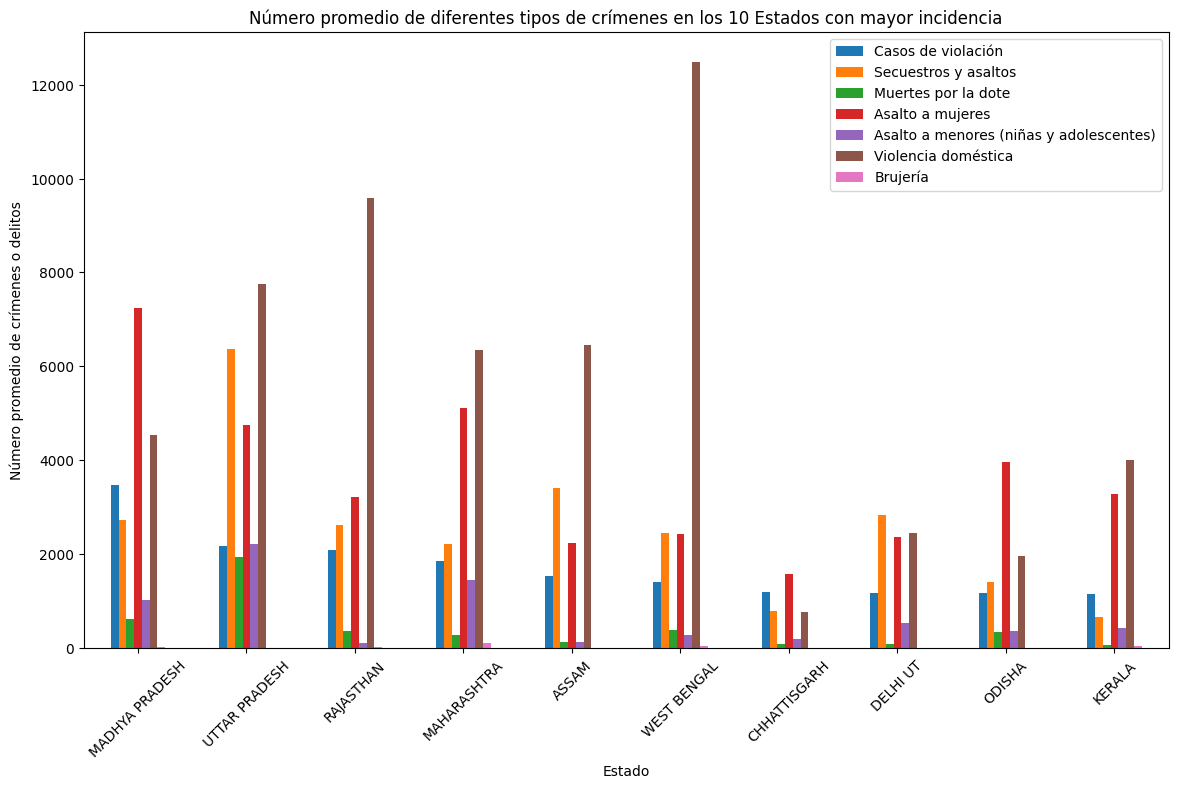

In [9]:
# Calcular el promedio de cada tipo de crimen para los 10 estados con el mayor número total de crímenes.

top_states_mean_crime = crimes_df_cleaned_eda.groupby('Estado').mean().sort_values(by='Casos de violación', ascending=False).head(10)

# Graficar la comparación
plt.figure(figsize=(14, 8))
top_states_mean_crime.plot(kind='bar', figsize=(14, 8))

# Ajustar título y etiquetas
plt.title('Número promedio de diferentes tipos de crímenes en los 10 Estados con mayor incidencia')
plt.xlabel('Estado')
plt.ylabel('Número promedio de crímenes o delitos')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


In [10]:
# Calcular el promedio de cada tipo de crimen para los 10 estados con el mayor número total de crímenes
top_states_mean_crime = crimes_df_cleaned_eda.groupby('Estado').mean().sort_values(by='Casos de violación', ascending=False).head(10).reset_index()

# Crear el gráfico de barras interactivo
fig = px.bar(
    top_states_mean_crime,
    x='Estado',
    y=top_states_mean_crime.columns[1:],  # Selecciona todas las columnas menos la de 'Estado'
    title='Número promedio de diferentes tipos de crímenes en los 10 Estados con mayor incidencia',
    labels={'value': 'Número promedio de crímenes o delitos', 'variable': 'Tipo de crimen'},
    text_auto=True  # Muestra los valores sobre las barras
)

# Ajustar el diseño del gráfico
fig.update_layout(
    xaxis_title='Estado',
    yaxis_title='Número promedio de crímenes o delitos',
    xaxis_tickangle=-45
)

# Mostrar el gráfico
fig.show()